<a href="https://colab.research.google.com/github/stepsbtw/Machine-Learning/blob/main/01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Em um problema de regressão linear, suponhamos que a variável alvo pode ser aproximada por uma função linear dos dados. Isto é:

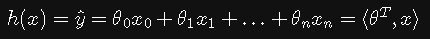

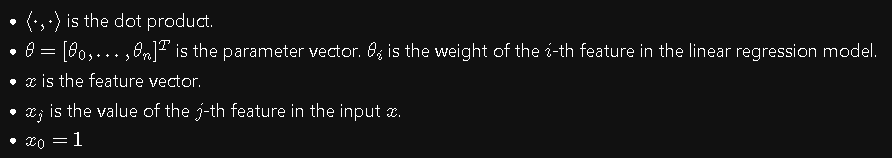

Podemos implementar o algoritmo de aprendizado **Regressão Linear** de 3 maneiras diferentes.

Mas primeiro, irei gerar um dataset sintética para testarmos as implementações.

In [82]:
import numpy as np

area = np.random.uniform(500,4000,100)
preco_base = 50000 # + b
preco_por_area = 300 # ax

noise = np.random.normal(0,20000,100) # adicionar certa aleatoriedade nos targets

preco = preco_base + preco_por_area * area + noise

Com esse código, a função f(x) que gera nossos dados é literalmente uma função linear (reta).

Perfeito para utilizarmos a regressão linear para aproximá-la!

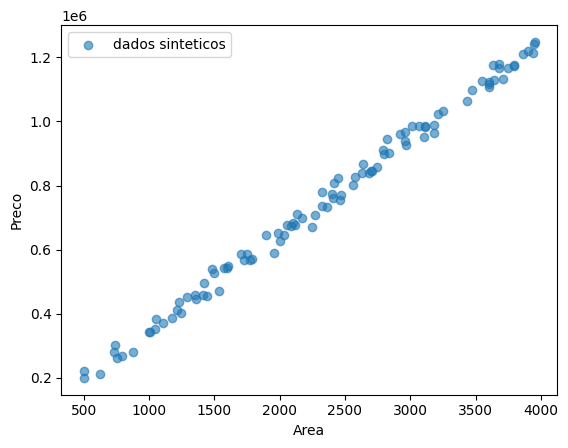

In [83]:
import matplotlib.pyplot as plt

plt.scatter(area, preco, label="dados sinteticos",alpha=0.6)

plt.xlabel("Area")
plt.ylabel("Preco")
plt.legend()
plt.show()

#Equação Normal
Dada uma equação Matricial (Sistema Linear):

image.png,

A equação normal é aquela que **minimiza** a soma dos quadrados das diferenças entre o lado esquerdo e direito.

image.png, 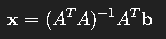

É chamada de **normal** porque o **vetor de erro**
image.png é **ortogonal** ao espaço gerado pelas colunas de A ( ou seja, está normal ao espaço imagem de A )


**OBSERVAÇÕES**:
- Se image.png não for **Invertível** (ou seja, singular, *determinante = 0*), a equação normal pode não ter solução **única**.
- Por isso em Datasets grandes ou com colinearidade (colunas **Linearmente Dependentes**, ou seja, colunas são combinações lineares de outras), é melhor utilizar outros métodos como o **Gradiente Descendente**

# Implementação 1) Utilizando a Equação Normal
Encontrar a reta **BEST FIT** para os dados.

Podemos encontrar o vetor de parâmetros direto, minimizando o erro analiticamente:

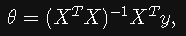

1. Utiliza inversão de matrizes - Uma operação cara, se matriz n x n = O(n^3)
2. A fórmula é derivada da função de custo do **Erro quadrático**, então caso seja necessário usar outra função, não da certo.

In [103]:
from numpy.linalg import inv

X = np.column_stack((np.ones(area.shape[0]), area))
y = preco.reshape(-1,1) # vetor coluna

params = inv(X.T.dot(X)).dot(X.T).dot(y)

print(f"constante (theta 0): {params[0]}")
print(f"inclinacao (theta 1): {params[1]}")

constante (theta 0): [48505.94902264]
inclinacao (theta 1): [300.1583036]


In [104]:
amostra = 2000
y_pred = params[0][0] + params[1][0] * amostra
print(f"area: {amostra}", f"preco : {y_pred}")

area: 2000 preco : 648822.5562203752


# Implementação 2) Utilizando a Descida de Gradiente
Ao invés de usar a fórmula explicita, vamos iterativamente minimizando a função de custo J.

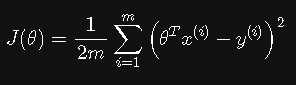

Onde m é o numero de elementos no conjunto de dados.

É a implementação mais simples. O método numérico encontra o mínimo ou máximo de uma função. (Linear ou Logística) A cada iteração, uma pequena mudança é feita no vetor de parâmetros Θ.

In [105]:
# Hiperparametros
learning_rate = 0.0000001
iteracoes = 1000

theta = [0,0]

X = area
y = preco
m = len(y) # numero de exemplos

# predizer, calcular distancia quadratica, media das distancias (normalizada) = MSE
# ajustar o vetor de parametros a fim de minimizar o MSE
for _ in range(iteracoes):
  y_pred = theta[0] + theta[1] * X

  dists = y_pred - y
  #mse = np.sum(dists**2) / (2 * m)

  dtheta0 = (1/m) * np.sum(dists)
  dtheta1 = (1/m) * np.sum(dists * X)

  theta[0] = theta[0] - learning_rate * dtheta0
  theta[1] = theta[1] - learning_rate * dtheta1

print(theta[0], theta[1])

0.8199938376554612 317.9018485085167


Agora vamos predizer um teste!

In [106]:
sample_area = 2000
price_pred = theta[0] + theta[1] * sample_area
print(sample_area, price_pred)

2000 635804.5170108711


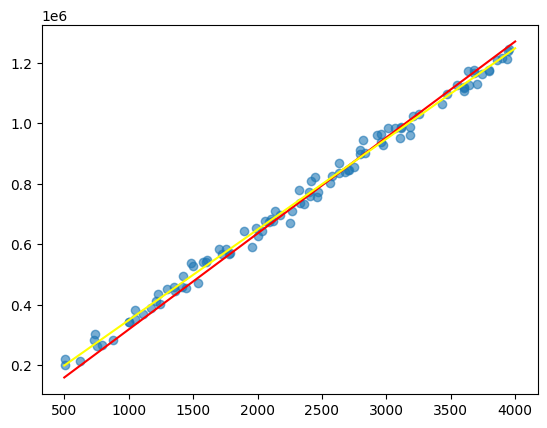

In [94]:
import matplotlib.pyplot as plt

plt.scatter(area,preco,alpha=0.6)

x_values = np.linspace(500,4000,100)

y_grad_values = theta[0] + theta[1] * x_values
plt.plot(x_values, y_grad_values, color="red")

y_values = params[0][0] + params[1][0] * x_values
plt.plot(x_values, y_values, color="yellow")

plt.show()

# Utilizando o SCIKIT-LEARN

In [111]:
from sklearn.linear_model import LinearRegression

print(area.shape, preco.shape)

# our lists need to be 2d vectors.
X = area.reshape(-1,1)
y = preco.reshape(-1,1)
print(X.shape, y.shape)

reg = LinearRegression().fit(X,y)

print(reg.coef_)
print(reg.intercept_)

(100,) (100,)
(100, 1) (100, 1)
[[300.1583036]]
[48505.94902265]


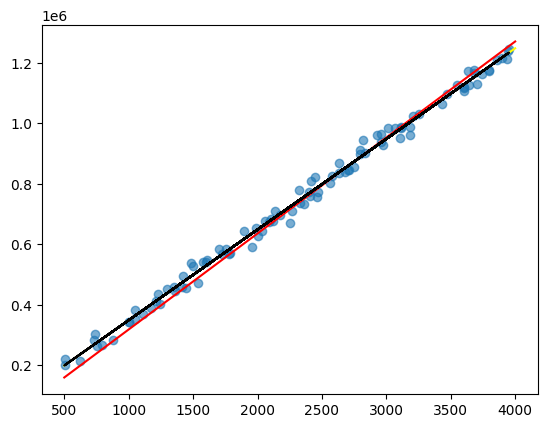

In [114]:
plt.scatter(area,preco,alpha=0.6)

x_values = np.linspace(500,4000,100)

y_grad_values = theta[0] + theta[1] * x_values
plt.plot(x_values, y_grad_values, color="red")

y_values = params[0][0] + params[1][0] * x_values
plt.plot(x_values, y_values, color="yellow")

y_sk_values = reg.predict(X)
plt.plot(X, y_sk_values, color="black")

plt.show()